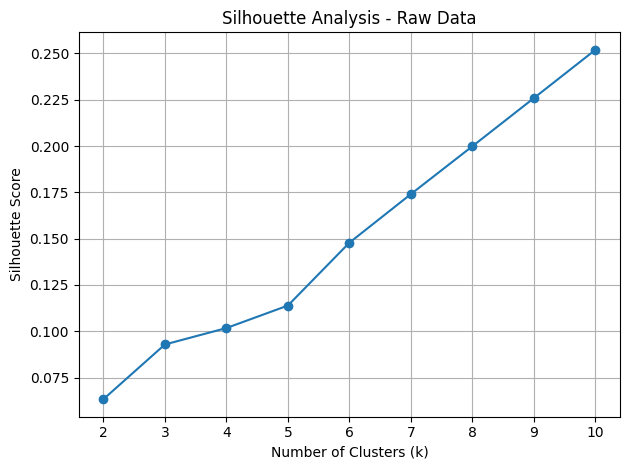

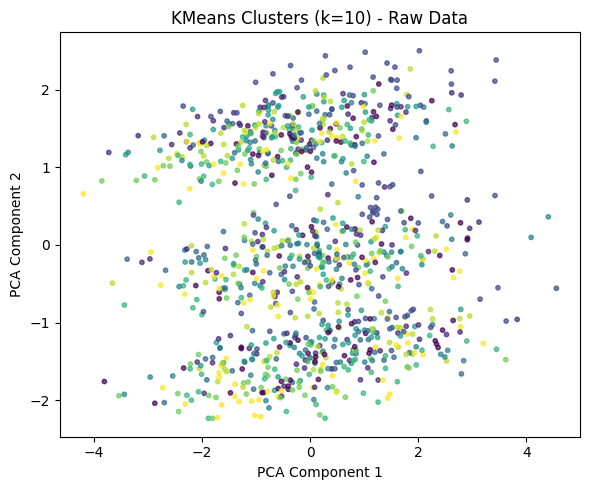

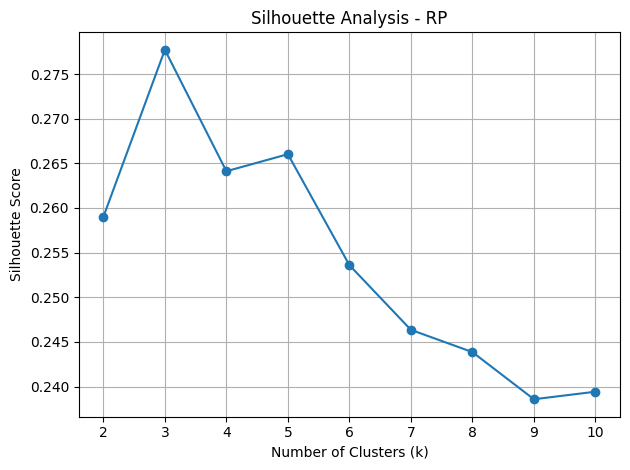

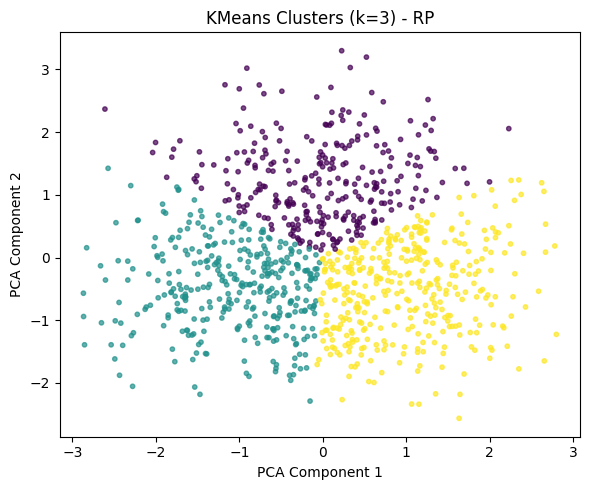

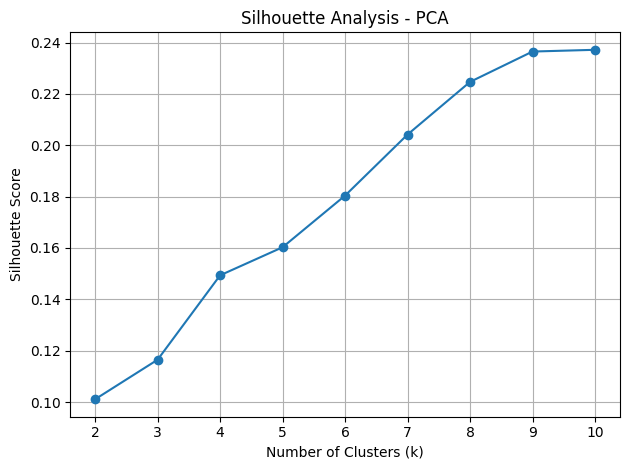

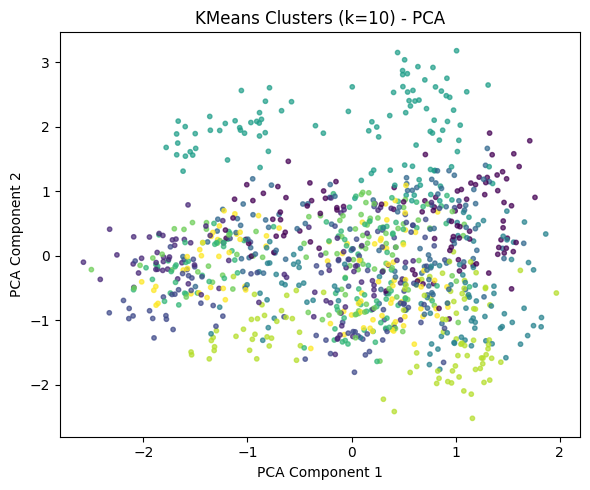

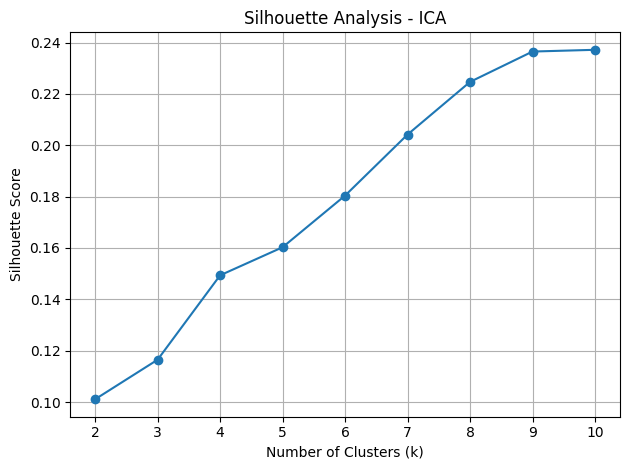

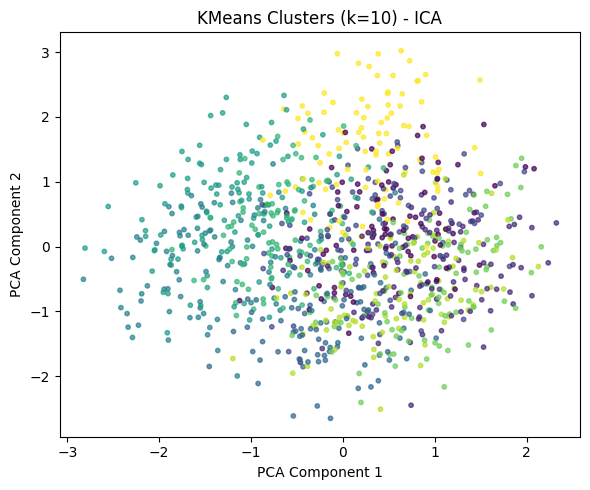

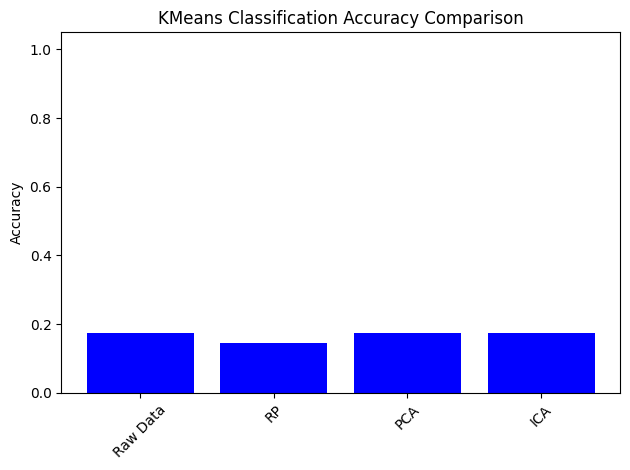

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import mode
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# Replace with your file paths
datasets = [
    ("Raw Data", "filtered_cancer_data.csv"),
    ("RP", "Cancer_best_random_projection_data.csv"),
    ("PCA", "Cancer_best_pca_data.csv"),
    ("ICA", "Cancer_best_ica_data.csv"),
]

y = pd.read_csv('filtered_cancer_outcome.csv').values.ravel()
le = LabelEncoder()
y_numeric = le.fit_transform(y)

accuracies = []
optimal_clusters_dict = {}

for name, feature_path in datasets:
    X = pd.read_csv(feature_path).values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    silhouette_scores = []
    cluster_range = range(2, 11)

    # Find the optimal number of clusters using silhouette score
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=5, max_iter=300, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    # Plot silhouette scores
    plt.figure()
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title(f'Silhouette Analysis - {name}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f"Silhouette_{name.replace(' ', '_')}.png")
    plt.show()

    # Select the best k
    best_k = cluster_range[np.argmax(silhouette_scores)]
    optimal_clusters_dict[name] = best_k

    # Run KMeans with optimal k
    kmeans = KMeans(n_clusters=best_k, n_init=5, max_iter=300, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Map clusters to true labels using majority vote
    labels = np.zeros_like(clusters)
    for i in range(best_k):
        mask = clusters == i
        if np.sum(mask) == 0:
            continue  # avoid empty clusters
        labels[mask] = mode(y_numeric[mask], keepdims=True).mode[0]
    
    # Compute accuracy
    acc = accuracy_score(y_numeric, labels)
    accuracies.append((name, acc))

    # 2D Cluster plot with PCA
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    plt.figure(figsize=(6, 5))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.7)
    plt.title(f'KMeans Clusters (k={best_k}) - {name}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.tight_layout()
    #plt.savefig(f"KMeans_Clusters_{name.replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()

# Save accuracies to JSON
results_dict = {name: acc for name, acc in accuracies}
with open("cancer_kmeans_accuracies.json", "w") as f:
    json.dump(results_dict, f, indent=4)

# Save optimal clusters to JSON
with open("cancer_kmeans_optimal_clusters.json", "w") as f:
    json.dump(optimal_clusters_dict, f, indent=4)

# Bar chart of accuracy scores
names, scores = zip(*accuracies)
plt.bar(names, scores, color='blue')
plt.ylabel("Accuracy")
plt.title("KMeans Classification Accuracy Comparison")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


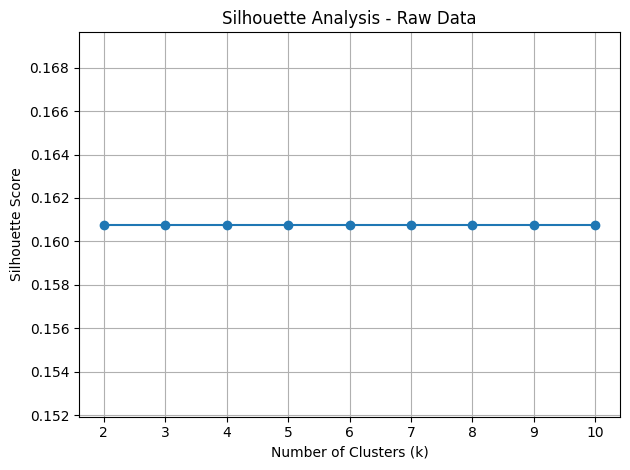

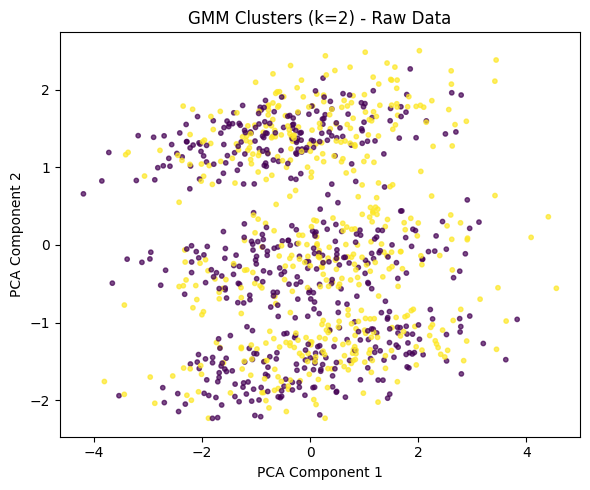

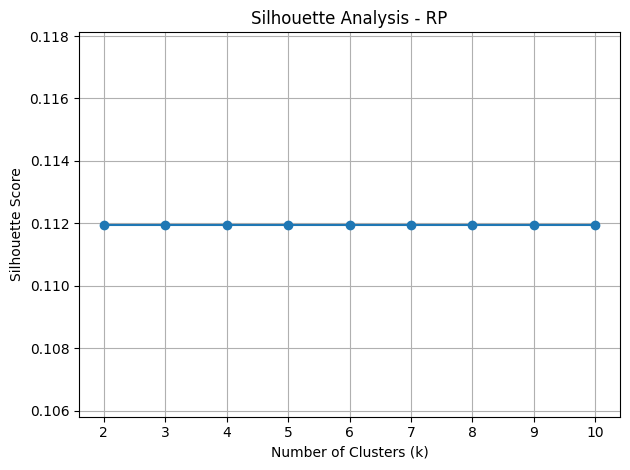

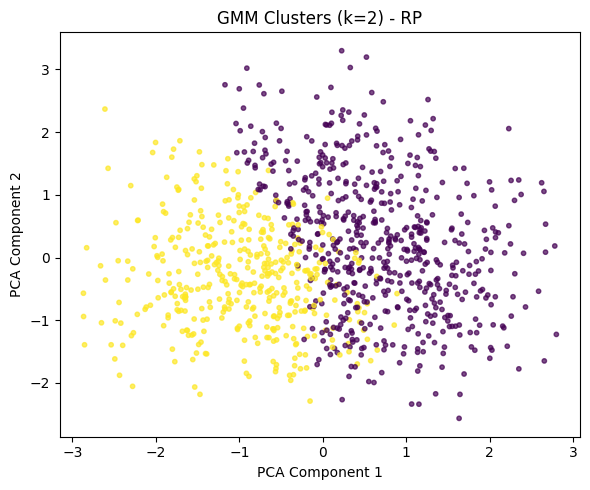

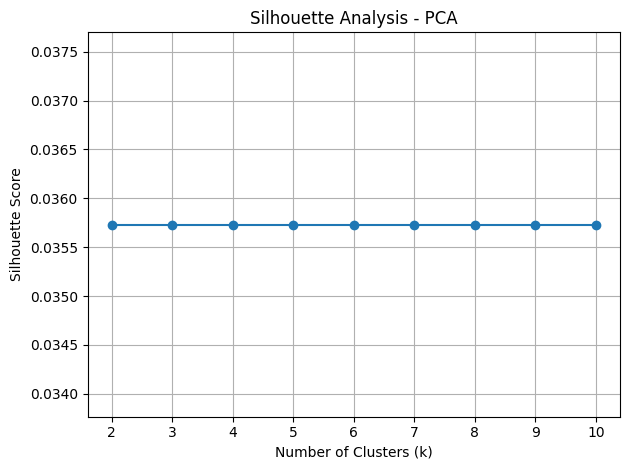

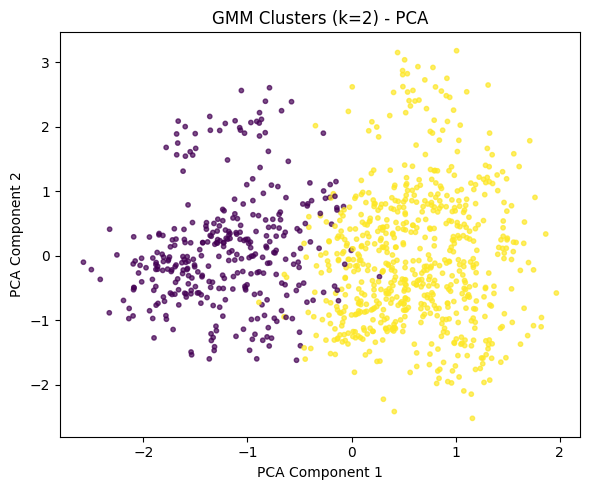

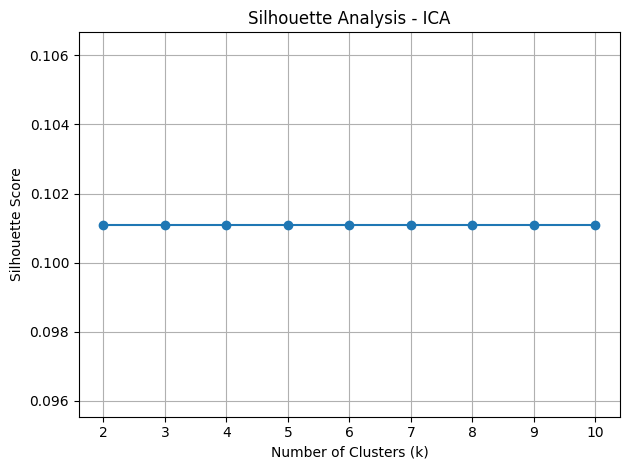

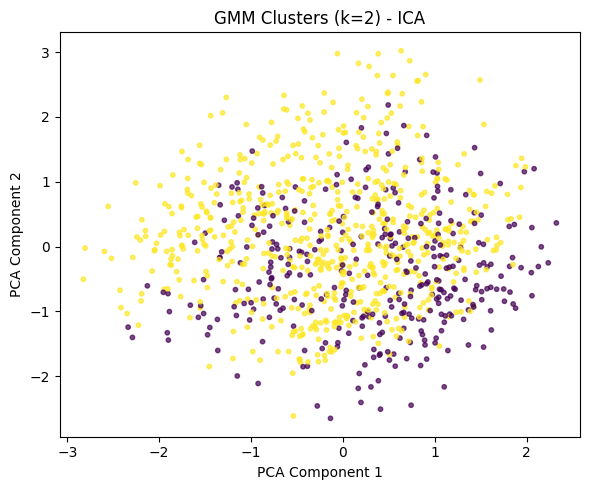

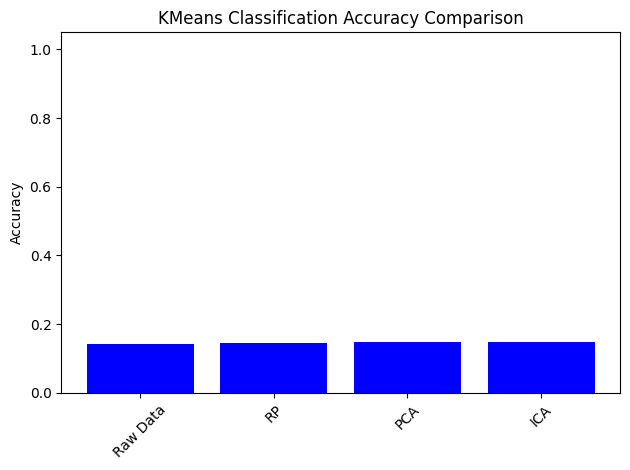

In [6]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import mode
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Replace with your file paths
datasets = [
    ("Raw Data", "filtered_cancer_data.csv"),
    ("RP", "Cancer_best_random_projection_data.csv"),
    ("PCA", "Cancer_best_pca_data.csv"),
    ("ICA", "Cancer_best_ica_data.csv"),
]

y = pd.read_csv('filtered_cancer_outcome.csv').values.ravel()
le = LabelEncoder()
y_numeric = le.fit_transform(y)

accuracies = []
optimal_clusters_dict = {}

for name, feature_path in datasets:
    X = pd.read_csv(feature_path).values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    silhouette_scores = []
    cluster_range = range(2, 11)

    # Find the optimal number of clusters using silhouette score
    for k in cluster_range:
        gmm = GaussianMixture(n_components=k, n_init=5, reg_covar=10e-3, max_iter=300, random_state=42)
        clusters = gmm.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    # Plot silhouette scores
    plt.figure()
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title(f'Silhouette Analysis - {name}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f"Silhouette_{name.replace(' ', '_')}.png")
    plt.show()

    # Select the best k
    best_k = cluster_range[np.argmax(silhouette_scores)]
    optimal_clusters_dict[name] = best_k

    gmm = GaussianMixture(n_components=best_k, n_init=5, reg_covar=10e-3, max_iter=300, random_state=42)
    clusters = gmm.fit_predict(X)

    # Map clusters to true labels using majority vote
    labels = np.zeros_like(clusters)
    for i in range(best_k):
        mask = clusters == i
        if np.sum(mask) == 0:
            continue  # avoid empty clusters
        labels[mask] = mode(y_numeric[mask], keepdims=True).mode[0]
    
    # Compute accuracy
    acc = accuracy_score(y_numeric, labels)
    accuracies.append((name, acc))

    # 2D Cluster plot with PCA
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    plt.figure(figsize=(6, 5))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.7)
    plt.title(f'GMM Clusters (k={best_k}) - {name}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.tight_layout()
    #plt.savefig(f"KMeans_Clusters_{name.replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()

# Save accuracies to JSON
results_dict = {name: acc for name, acc in accuracies}
with open("cancer_GMM_accuracies.json", "w") as f:
    json.dump(results_dict, f, indent=4)

# Save optimal clusters to JSON
with open("cancer_GMM_optimal_clusters.json", "w") as f:
    json.dump(optimal_clusters_dict, f, indent=4)

# Bar chart of accuracy scores
names, scores = zip(*accuracies)
plt.bar(names, scores, color='blue')
plt.ylabel("Accuracy")
plt.title("KMeans Classification Accuracy Comparison")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
